In [1]:
#  Python
# Program: SimulatedAnnealing_v6.py
# Purpose: Simulated annealing algorithm for traveling salesman problem
#   TSP

#  -*- coding: utf-8 -*-
import math                         #  math
import random                       #  random
import pandas as pd                 #  pandas  pd
import numpy as np                  #  numpy  np YouCans
import matplotlib.pyplot as plt     #  matplotlib.pyplot  plt
import time
from tqdm import tqdm, tqdm_notebook
# check memory
from memory_profiler import memory_usage

np.set_printoptions(precision=4)
pd.set_option('display.max_rows', 20)
pd.set_option('expand_frame_repr', False)
pd.options.display.float_format = '{:,.2f}'.format

# 
def initParameter():
    # custom function initParameter():
    # Initial parameter for simulated annealing algorithm
    tInitial = 100.0                # (initial temperature)
    tFinal  = 1                     # (stop temperature)
    nMarkov = 1000                # Markov
    alfa    = 0.98                 # T(k)=alfa*T(k-1)

    return tInitial,tFinal,alfa,nMarkov

# TSPLib
def read_TSPLib(fileName):
     #custom function read_TSPLib(fileName)
    # Read datafile *.dat from TSPlib
    # return coordinates of each city by YouCans, XUPT

    res = []
    with open(fileName, 'r') as fid:
        for item in fid:
            if len(item.strip())!=0:
                res.append(item.split())

    loadData = np.array(res).astype('int')      # i Xi Yi
    coordinates = loadData[:,1::]
    return coordinates

# 
def getDistMat(nCities, coordinates):
    # custom function getDistMat(nCities, coordinates):
    # computer distance between each 2 Cities
    distMat = np.zeros((nCities,nCities))       # 
    for i in range(nCities):
        for j in range(i,nCities):
            # np.linalg.norm   ij 
            distMat[i][j] = distMat[j][i] = round(np.linalg.norm(coordinates[i]-coordinates[j]))
    return distMat                              # 

#  TSP 
def calTourMileage(tourGiven, nCities, distMat):
    # custom function caltourMileage(nCities, tour, distMat):
    # to compute mileage of the given tour
    mileageTour = distMat[tourGiven[nCities-1], tourGiven[0]]   # dist((n-1),0)
    for i in range(nCities-1):                                  # dist(0,1),...dist((n-2)(n-1))
        mileageTour += distMat[tourGiven[i], tourGiven[i+1]]
    return round(mileageTour)                     # 

#  TSP 
def plot_tour(tour, value, coordinates):
    # custom function plot_tour(tour, nCities, coordinates)

    num = len(tour)
    x0, y0 = coordinates[tour[num - 1]]
    x1, y1 = coordinates[tour[0]]
    plt.scatter(int(x0), int(y0), s=15, c='r')      #  C(n-1)
    plt.plot([x1, x0], [y1, y0], c='b')             #  C(n-1)~C(0)
    for i in range(num - 1):
        x0, y0 = coordinates[tour[i]]
        x1, y1 = coordinates[tour[i + 1]]
        plt.scatter(int(x0), int(y0), s=15, c='r')  #  C(i)
        plt.plot([x1, x0], [y1, y0], c='b')         #  C(i)~C(i+1)

    plt.xlabel("Total mileage of the tour:{:.1f}".format(value))
    plt.title("Optimization tour of TSP{:d}".format(num))  # 
    plt.show()

# 
def mutateSwap(tourGiven, nCities):
    # custom function mutateSwap(nCities, tourNow)
    # produce a mutation tour with 2-Swap operator
    # swap the position of two Cities in the given tour

    #  [0,n)  2 i,j
    i = np.random.randint(nCities)          #  [0,n) 
    while True:
        j = np.random.randint(nCities)      #  [0,n) 
        if i!=j: break                      #  i, j 

    tourSwap = tourGiven.copy()             #  tourSwap
    tourSwap[i],tourSwap[j] = tourGiven[j],tourGiven[i] #   i  j 

    return tourSwap

def main():
    # 
    time_start = time.time() #計時開始
    # # 
      
    fileName = r"C:\Users\User\Desktop\Q3\tsp10.txt"
#    fileName = r"C:\Users\User\Desktop\Q3\tsp100.txt"
#    fileName = r"C:\Users\User\Desktop\Q3\tsp1000.txt"
    coordinates = read_TSPLib(fileName)                 # 

    # 
    tInitial,tFinal,alfa,nMarkov = initParameter()      # 

    nCities = coordinates.shape[0]              #   nCities
    distMat = getDistMat(nCities, coordinates)  # 
    nMarkov = nCities                           # Markov 
    tNow    = tInitial                          #  (current temperature)

    # 
    tourNow   = np.arange(nCities)   # 01n 
    valueNow  = calTourMileage(tourNow,nCities,distMat) #  valueNow
    tourBest  = tourNow.copy()                          #  tourNow
    valueBest = valueNow                                #  valueNow
    recordBest = []                                     #  
    recordNow  = []                                     #  

    # 
    iter = 0  
    
    last_state =0
    
    while tNow >= tFinal:           # 
        # (nMarkov)

        for k in range(nMarkov):    # Markov
            # 
            tourNew = mutateSwap(tourNow, nCities)      #   
            # tourNew,deltaE = mutateSwapE(tourNow,nCities,distMat)   #    deltaE
            valueNew = calTourMileage(tourNew,nCities,distMat) # 
            deltaE = valueNew - valueNow

            #  Metropolis 
            if deltaE < 0:                          # 
                accept = True
                if valueNew < valueBest:            # 
                    tourBest[:] = tourNew[:]
                    valueBest = valueNew
                    last_state = iter
            else:                                   # 
                pAccept = math.exp(-deltaE/tNow)    # 
                if pAccept > random.random():
                    accept = True
                else:
                    accept = False

            # 
            if accept == True:                      # 
                tourNow[:] = tourNew[:]
                valueNow = valueNew

        #  0,n-1
        tourNow = np.roll(tourNow,2)                # 

        # 
        recordBest.append(valueBest)                #  
        recordNow.append(valueNow)                  #  
        #print('i:{}, t(i):{:.2f}, valueNow:{:.1f}, valueBest:{:.1f}'.format(iter,tNow,valueNow,valueBest))

        # 
        iter = iter + 1
        tNow = tNow * alfa                              # T(k)=alfa*T(k-1)
    
    time_end = time.time() #計時終止
    # 

    # 
    # 
    # figure1 = plt.figure()     #  1
    # plot_tour(tourBest, valueBest, coordinates)
    # figure2 = plt.figure()     #  2
    # plt.title("Optimization result of TSP{:d}".format(nCities)) # 
    # plt.plot(np.array(recordBest),'b-', label='Best')           #  recordBest
    # plt.plot(np.array(recordNow),'g-', label='Now')             #  recordNow
    # plt.xlabel("iter")                                          #  x
    # plt.ylabel("mileage of tour")                               #  y
    # plt.legend()                                                # 
    # plt.show()

    # print("Tour verification successful!")
    # print("Best tour: \n", tourBest)
    # print("Best value: {:.1f}".format(valueBest))
    # print("Execution Time (s):", time_end - time_start)
    
    
    return recordBest,time_end - time_start, valueBest, last_state
    

if __name__ == '__main__':

    main()


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:46<00:00,  4.64s/it]


Finished!


,max,avg,min
Memory,97.84,97.83,97.82
Elapsed_time,0.20,0.13,0.09
Obj_function_value,305.00,301.40,301.00


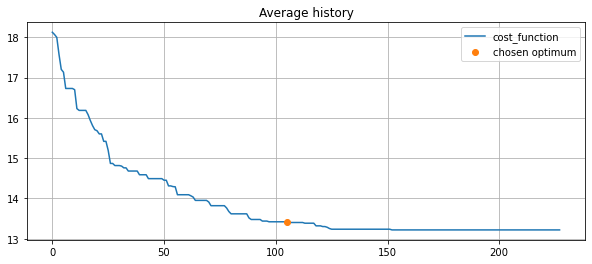

In [2]:
# set the test times. (At least 10 times.)
TEST_TIMES = 10

result_history, result_last_state, result_obj_function_value, result_elapsed_time, result_memory = [], [], [], [], []

for i in tqdm(range(TEST_TIMES)):
    history,elapsed_time, obj_function_value,last_state = main()
    #### memory_out  
    memory_out = memory_usage((main,()),interval=1)
    #### 
    avg_memory_out = sum(memory_out) / len(memory_out)
    
    result_history.append(history)
    result_last_state.append(last_state)
    result_obj_function_value.append(obj_function_value)
    result_elapsed_time.append(elapsed_time)
    result_memory.append(avg_memory_out)
    
max_obj_function_value, avg_obj_function_value, min_obj_function_value  = max(result_obj_function_value), sum(result_obj_function_value) / len(result_obj_function_value), min(result_obj_function_value)
max_elapsed_time, avg_elapsed_time, min_elapsed_time  = max(result_elapsed_time), sum(result_elapsed_time) / len(result_elapsed_time), min(result_elapsed_time)
max_memory, avg_memory, min_memory  = max(result_memory), sum(result_memory) / len(result_memory), min(result_memory)

# change format
pd.options.display.float_format = '{:.2f}'.format

print("Finished!")

# Show the average history
history_avg = []
for i in range(len(result_history[0])):
    avg_num = 0
    for j in range(len(result_history)):
        avg_num += result_history[j][i]
    avg_num = avg_num / len(result_history[0])
    history_avg.append(avg_num)
    
last_state_avg =  int(sum(result_last_state) / len(result_last_state))

plt.figure(figsize=(10, 4))
plt.plot(history_avg, label='cost_function')
plt.plot(last_state_avg+2,
         history_avg[last_state_avg],
         'o', label='chosen optimum')
plt.grid()
plt.legend()
plt.title('Average history')

# Show the results
df = pd.DataFrame()
df['max'] = 0
df['avg'] = 0 
df['min'] = 0 
df.loc['Memory'] = [max_memory, avg_memory, min_memory ]
df.loc['Elapsed_time'] = [max_elapsed_time, avg_elapsed_time, min_elapsed_time]
df.loc['Obj_function_value'] = [max_obj_function_value, avg_obj_function_value, min_obj_function_value]
df